#### Dependencies
***

In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#### Data Sets
***

In [3]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA_Data_2000.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


#### DataFrame and DataFrame Manipulation
***

In [4]:
#preview DataFrames
#print(nba_data_df.count())
#print(height_weight_df.count())

In [5]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
3,2000,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
4,2000,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0


In [6]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


In [7]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,SG,26.0,DEN,29.0,12.0,420.0,5.8,0.438,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,SG,27.0,TOT,24.0,12.0,441.0,9.8,0.418,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


In [8]:
#remove 'unnamed' and position columns; groupby year and position

complete_df = merged_df.drop(["position"],axis=1)
complete_df = complete_df.sort_values(by="Year")

grouped_df = complete_df.groupby(["Year", "Pos"])
grouped_df

In [9]:
#Find out column names of original dataframe
complete_df.columns

Index(['Year', 'name', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'weight', 'height (inches)', 'height(feet)'],
      dtype='object')

#### Data Analysis
***

##### Average minutes played 

In [10]:
#Get the average minutes played for each position and each year

avg_minutes_df = grouped_df.MP.mean()
type(avg_minutes_df)

#Turn into DataFrame

avg_minutes_df = avg_minutes_df.to_frame()
type(avg_minutes_df)

#Reset index of DataFrame
avg_minutes_df = avg_minutes_df.reset_index()
avg_minutes_df.head()

,Year,Pos,MP
0,2000,C,1035.475000
1,2000,PF,1096.312500
2,2000,PF-SF,1305.000000
3,2000,PG,1104.943396
4,2000,SF,1296.846154


Text(0.5,1,'Average Minutes Played by Centers')

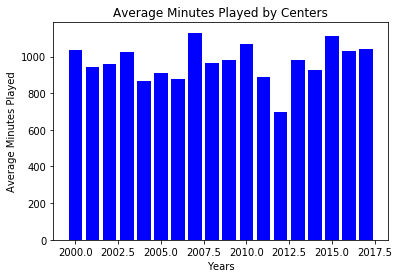

In [19]:
#Centers Minutes
centers_min = avg_minutes_df.loc[avg_minutes_df["Pos"] == "C"]

plt.bar(centers_min["Year"], centers_min["MP"], color='Blue')


#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Centers")

Text(0.5,1,'Average Minutes Played by Power Forwards')

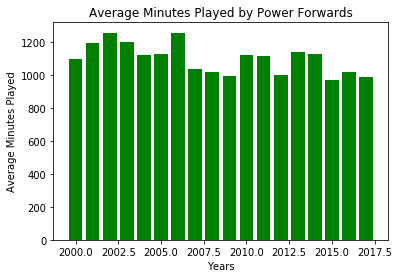

In [18]:
#Power Forward Minutes
pf_min = avg_minutes_df.loc[avg_minutes_df["Pos"] == "PF"]

plt.bar(pf_min["Year"],pf_min["MP"],color="Green")

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Power Forwards")

Text(0.5,1,'Average Minutes Played by Power Forward/Center(s)')

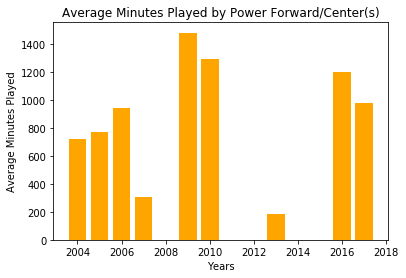

In [17]:
#Power Forward-Center Minutes
pf_c_min = avg_minutes_df.loc[avg_minutes_df["Pos"] == "PF-C"]

plt.bar(pf_c_min["Year"],pf_c_min["MP"],color="orange")

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Power Forward/Center(s)")

Text(0.5,1,'Average Minutes Played by Center-Power Forward(s)')

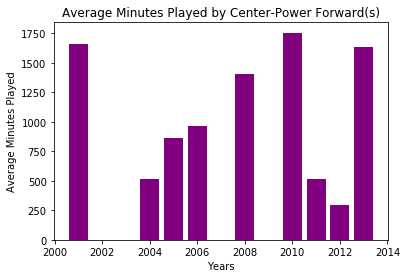

In [14]:
#Center-Power Forward Minutes
c_pfmin = avg_minutes_df.loc[avg_minutes_df["Pos"] == "C-PF"]

plt.bar(c_pfmin["Year"],c_pfmin["MP"],color="purple")

#Set Axis Labels and Titles
#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Center-Power Forward(s)")

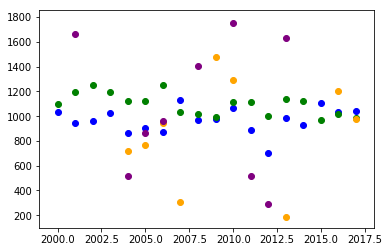

In [15]:
#all Together

plt.scatter(centers_min["Year"], centers_min["MP"], c='Blue')
plt.scatter(pf_min["Year"],pf_min["MP"],c="Green")
plt.scatter(pf_c_min["Year"],pf_c_min["MP"],c="orange")
plt.scatter(c_pfmin["Year"],c_pfmin["MP"],c="purple")


In [16]:
#Disregard

#set multi-index by year and name: year_name_df
#year_pos_df = complete_df.set_index(['Year',('Pos')])
#year_pos_df = year_pos_df.sort_index()
#year_pos_df.mean()



#Disregard

#Create a DataFrame only containing big men
#year_2000 = year_pos_df[np.in1d(year_pos_df.index.get_level_values(0), [2000])]
#big_men_df_2000 = year_2000[np.in1d(year_2000.index.get_level_values(1), ['C','C-PF','PF', 'PF-C'])]
#big_men_df_2000
